In [1]:
!pip install langdetect
!pip install googletrans==3.1.0a0
!pip install collections
!pip install wordcloud
!pip install contractions
!pip install autocorrect
!pip install unidecode
!pip install rake_nltk
!pip install yake
!pip install gensim
!pip install yellowbrick
!pip install imblearn

ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


In [2]:
# importing libraries

# for language detection
from langdetect import detect

# for language translation
from googletrans import Translator

# to get counts and most common elements
from collections import Counter

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to get wordcloud
from wordcloud import WordCloud

# to fetch ngrams
from nltk.util import ngrams

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# for data analysis and manipulation
import pandas as pd
import numpy as np

# to expand the text (don't to do not)
import contractions

# to auto correct the words
from autocorrect import Speller

# for handling accented characters (Á to A)
from unidecode import unidecode

# to get list of punctuations
from string import punctuation

# nltk libraries 
from nltk.tokenize import word_tokenize # to make tokens (sentense/words)
from nltk.corpus import stopwords # to get list of stopwords
from nltk.stem import WordNetLemmatizer # to find root words

# for extracting the keywords
import yake
from rake_nltk import Rake

# for making vectors of the documents
from gensim.models import Word2Vec, keyedvectors

# to see how the clusters are generated
from yellowbrick.cluster import SilhouetteVisualizer

# scikit_learn libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from xgboost import XGBClassifier

# to balance the data
from imblearn.over_sampling import SMOTE

In [3]:
path = "D:/Projects/EmailSpam/spam.csv"
df = pd.read_csv(path,encoding = "ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# renaming the columns
df = df[["v1","v2"]]
df.rename({"v1": "target","v2":"text"},axis = 1,inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# Defining the function to detect languages
# If we have empty string so langdetect will give error. So, I am using try except.
def lang_detect(data):
    m = ""
    try:
        m = detect(data)
    except:
        pass
    return m
s = pd.Series(df["text"].apply(lang_detect))
s.unique()

array(['en', 'id', 'so', 'af', 'it', 'ca', 'da', 'cy', 'sk', 'sl', 'fr',
       'nl', 'tl', 'es', 'vi', 'no', 'de', 'sq', 'et', 'sv', 'pt', 'sw',
       'fi', 'pl', 'hr', '', 'ro', 'tr', 'cs', 'lt'], dtype=object)

In [6]:
# defining the function for translation
def lang_translate(data):
    translor = Translator()
    tr_text = translor.translate(data,dest="en")
    return tr_text.text
df["mail"] = df["text"].apply(lang_translate)
df.head()

,target,text,mail
0,ham,"Go until jurong point, crazy.. Available only ...","Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...,Ok lar... Joking with u and i...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...","Nah I don't think he goes to usf, he lives aro..."


In [7]:
# As we know translator takes high time to translate.
# So I am exporting this file for further use.
df.to_csv("translated_mail.csv",index = False)

In [8]:
# dropping the text features as we have new features mail with translated mails
df.drop("text",axis = 1, inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   mail    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
df.isna().sum()

target    0
mail      0
dtype: int64

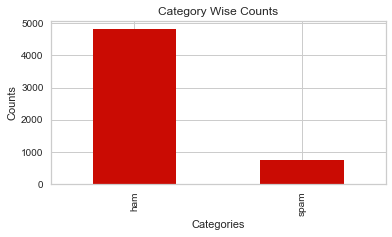

In [11]:
_ = df.target.value_counts()
plt.figure(figsize = (6,3))
_.plot(kind = "bar",color = "r")
plt.ylabel("Counts")
plt.xlabel("Categories")
plt.title("Category Wise Counts")
plt.show()

In [15]:
def get_ngrams(data, n_range):
    tokens = data.split()
    ngrms  = ngrams(tokens, n_range ) # provide zip file
    ngrms_lst = []
    for i in ngrms: #unzipping the file
        ngrms_lst.append(" ".join(i))
    return ngrms_lst

In [16]:
unigrams = df.mail.apply(lambda x: get_ngrams(x,1))
unigrams.head(10)

0    [Go, until, jurong, point,, crazy.., Available...
1             [Ok, lar..., Joking, with, u, and, i...]
2    [Free, entry, in, 2, a, wkly, comp, to, win, F...
3    [U, dun, say, so, early, hor..., U, c, already...
4    [Nah, I, don't, think, he, goes, to, usf,, he,...
5    [FreeMsg, Hey, there, darling, it's, been, 3, ...
6    [Even, my, brother, is, not, like, to, speak, ...
7    [As, per, your, request, 'Melle, Melle, (Oru, ...
8    [WINNER!!, As, a, valued, network, customer, y...
9    [Had, your, mobile, 11, months, or, more?, U, ...
Name: mail, dtype: object

In [17]:
lst = []
for i in unigrams:
    lst.extend(i)
Counter(lst).most_common(10)

[('to', 2147),
 ('you', 1635),
 ('I', 1473),
 ('a', 1343),
 ('the', 1208),
 ('and', 903),
 ('in', 808),
 ('is', 788),
 ('i', 742),
 ('u', 680)]

In [18]:
# cheking most repeted 10 trigrams
trigram = df.mail.apply(lambda x: get_ngrams(x,3))
lst1 = []
for i in trigram:
    lst1.extend(i)
Counter(lst1).most_common(10)

[("I'll call later", 39),
 ("Sorry, I'll call", 38),
 ('. . .', 26),
 ('I want to', 24),
 ('have won a', 23),
 ('I miss you', 20),
 ('prize GUARANTEED. Call', 19),
 ('å£1000 cash or', 17),
 ('are trying to', 16),
 ('Account Statement for', 16)]

In [19]:
def get_wordcloud(data,column):
    df_ = data[column].str.cat(sep = " ")
    text = " ".join([i for i in df_.split()])
    wcloud = WordCloud(width = 700, height = 500, background_color = "lightgreen").generate(text)
    plt.figure(figsize = (10,6))
    plt.imshow(wcloud)
    plt.axis("off")
    plt.title("Word Cloud")
    plt.show()

In [20]:
# Defining the function to extract keywords
def get_keypharses(data):
    key_ex = yake.KeywordExtractor()
    keyword = key_ex.extract_keywords(data) # give (kewword, score) in a tuple
    kw_lst = []
    for i in keyword:
        kw_lst.append(i[0]) # taking only keyword
    return kw_lst

In [21]:
kw = df.mail.apply(get_keypharses)
kw.head(10)

0    [crazy., jurong point, point, jurong, buffet, ...
1                                        [lar, Joking]
2    [Cup final tkts, win FA Cup, Cup final, final ...
3                         [early hor, hor, dun, early]
4                                    [Nah, usf, lives]
5    [FreeMsg Hey, Hey there darling, word back, He...
6    [aids patent, brother, speak, patent, treat, a...
7    [Oru Minnaminunginte Nurungu, Minnaminunginte ...
8    [WINNER, prize reward, claim, Valid, prize, re...
9    [Update, Mobile Update, months, Free, mobile, ...
Name: mail, dtype: object

In [22]:
lstk = []
for i in kw:
    lstk.extend(i)
Counter([i for i in lstk if len(i.split()) > 2]).most_common(10)

[('selected to receive', 13),
 ('attempt to contact', 13),
 ('pick the phone', 12),
 ('send a message', 12),
 ('customer service representative', 10),
 ('WON a guaranteed', 10),
 ('call our customer', 10),
 ('draw txt MUSIC', 9),
 ('chance to win', 9),
 ('anytime any network', 9)]

In [26]:
# Cleaning the data
def remove_spaces(data):
    clean_text = data.replace("\\n"," ").replace("\t"," ").replace("\\"," ")
    return clean_text

# defining the function for expanding text (can't to can not)
def expand_text(data):
    ex_text = contractions.fix(data)
    return ex_text

# defining the function for handling accented characters (Á to A)
def handling_accented(data):
    fix_text = unidecode(data)
    return fix_text

# defining the function for removing stopwords
stopword = stopwords.words("english") # gives a list of stopwords
stopword.remove("no") # removing neccessary stop words from list
stopword.remove("not")
stopword.remove("nor")

def clean_text(data):
    token = word_tokenize(data)
    clean_text = [i.lower() for i in token if (i not in punctuation) 
                  and (i.lower() not in stopword) and (i.isalpha()) and (len(i) > 2)]
    return clean_text

# defining the function for auto correction 
def auto_correct(data):
    spell = Speller(lang = "en")
    text = spell(data)
    return text

# defining the function for getting root words
def lemmatization(data):
    lem = WordNetLemmatizer()
    lst1 = []
    for i in data:
        lem_words = lem.lemmatize(i)
        lst1.append(lem_words)
    return " ".join(lst1)

In [29]:
import nltk


In [30]:
nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to C:\Users\Mohammed
[nltk_data]     Qadir\AppData\Roaming\nltk_data...


True

In [31]:
df["clean_mails"] = df["mail"].apply(remove_spaces)
df["clean_mails"] = df["clean_mails"].apply(expand_text)
df["clean_mails"] = df["clean_mails"].apply(handling_accented)
df["clean_mails"] = df["clean_mails"].apply(clean_text)
df["clean_mails"] = df["clean_mails"].apply(lambda x: auto_correct(x) if isinstance(x, str) or isinstance(x, bytes) else x)
df["clean_mails"] = df["clean_mails"].apply(lemmatization)

In [32]:
df.drop("mail",axis = 1, inplace = True)
df.head(2)

,target,clean_mails
0,ham,jurong point crazy available bugis great world...
1,ham,lar joking


In [33]:
df.target.replace({"spam": 0, "ham": 1}, inplace=True)

In [34]:
# spliting the data to avoid data leakage
x = df["clean_mails"]
y = df["target"]
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.25,random_state=42,stratify=y)

In [35]:
# Creating the vectors of the mails
cnv = CountVectorizer(max_df=0.95,max_features=1000,min_df = 10, stop_words="english",lowercase=True)
x_train = cnv.fit_transform(x_tr).A
x_test  = cnv.transform(x_te).A

In [36]:
# I am using SMOTE to avoid data duplicacy
st = SMOTE(sampling_strategy=0.75,random_state=42)
sm_x_train,sm_y_train = st.fit_resample(x_train,y_tr)
sm_x_test,sm_y_test   = st.fit_resample(x_test,y_te)

In [37]:
print(f"first we have\n{y_tr.value_counts()}\nAfter balancing we have\n{sm_y_train.value_counts()}")

first we have
1    3619
0     560
Name: target, dtype: int64
After balancing we have
1    3619
0    2714
Name: target, dtype: int64


In [38]:
# selecting the model
models = [("Multinomial Naive Bayes", MultinomialNB()),
          ("Gaussian Naive Bayes", GaussianNB()),
          ("XG Boost", XGBClassifier())]
for name,model in models:
    mod = model
    mod.fit(sm_x_train,sm_y_train)
    pred = mod.predict(sm_x_train)
    acc = accuracy_score(sm_y_train,pred)
    pred1 = mod.predict(sm_x_test)
    acc1 = accuracy_score(sm_y_test,pred1)
    print(f"The accuracy of the {name} model:\nAt Training: ",acc)
    print("At Testing: ",acc1)
    print("+"*50)

The accuracy of the Multinomial Naive Bayes model:
At Training:  0.8863098057792516
At Testing:  0.8232227488151659
++++++++++++++++++++++++++++++++++++++++++++++++++
The accuracy of the Gaussian Naive Bayes model:
At Training:  0.8120953734407074
At Testing:  0.7829383886255924
++++++++++++++++++++++++++++++++++++++++++++++++++
The accuracy of the XG Boost model:
At Training:  0.8926259276804043
At Testing:  0.8061611374407583
++++++++++++++++++++++++++++++++++++++++++++++++++


In [39]:
from sklearn.model_selection import RandomizedSearchCV
estimator = MultinomialNB()
params_NB = {'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000],
            "fit_prior":[True,False]} 
rnd = RandomizedSearchCV(estimator=estimator, param_distributions=params_NB,
                         cv= 3, verbose=3, scoring='accuracy',return_train_score=True) 
rnd.fit(sm_x_train,sm_y_train)
rnd.best_params_
#increase the CV to 7 when training on a high powered gpu else it will take high time

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END alpha=10, fit_prior=False;, score=(train=0.909, test=0.895) total time=   0.0s
[CV 2/3] END alpha=10, fit_prior=False;, score=(train=0.914, test=0.910) total time=   0.0s
[CV 3/3] END alpha=10, fit_prior=False;, score=(train=0.908, test=0.909) total time=   0.0s
[CV 1/3] END alpha=0.001, fit_prior=False;, score=(train=0.928, test=0.892) total time=   0.0s
[CV 2/3] END alpha=0.001, fit_prior=False;, score=(train=0.923, test=0.922) total time=   0.0s
[CV 3/3] END alpha=0.001, fit_prior=False;, score=(train=0.922, test=0.923) total time=   0.0s
[CV 1/3] END alpha=0.1, fit_prior=False;, score=(train=0.928, test=0.899) total time=   0.0s
[CV 2/3] END alpha=0.1, fit_prior=False;, score=(train=0.922, test=0.923) total time=   0.0s
[CV 3/3] END alpha=0.1, fit_prior=False;, score=(train=0.922, test=0.923) total time=   0.0s
[CV 1/3] END alpha=100, fit_prior=False;, score=(train=0.896, test=0.881) total time=   0.0s
[CV 2/

{'fit_prior': False, 'alpha': 0.1}

In [40]:
# training the model
mlnb = MultinomialNB(fit_prior = False, alpha = 1)
mlnb.fit(sm_x_train,sm_y_train)

MultinomialNB(alpha=1, fit_prior=False)

In [41]:
pred = mlnb.predict(sm_x_train)
acc = accuracy_score(sm_y_train,pred)
clf = classification_report(sm_y_train,pred)
print("Training accuracy is: ",acc)
print("\n")
print("The classifiaction report:\n",clf)

Training accuracy is:  0.9205747670930049


The classifiaction report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91      2714
           1       0.98      0.88      0.93      3619

    accuracy                           0.92      6333
   macro avg       0.92      0.93      0.92      6333
weighted avg       0.93      0.92      0.92      6333



In [42]:
pred1 = mlnb.predict(sm_x_test)
acc1 = accuracy_score(sm_y_test,pred1)
clf1 = classification_report(sm_y_test,pred1)
print("Testing accuracy is: ",acc1)
print("\n")
print("The classifiaction report:\n",clf1)

Testing accuracy is:  0.9


The classifiaction report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89       904
           1       0.95      0.87      0.91      1206

    accuracy                           0.90      2110
   macro avg       0.90      0.91      0.90      2110
weighted avg       0.91      0.90      0.90      2110



In [43]:
# testing the model whether it works for userinput.
dics = {1: "ham" , 0:"spam" }
#user input
text = "Nah I don't think he goes to usf, he lives around here though"

# first we create a vector of this review
vector1 = cnv.transform([text]).A

# getting prediction
prediction = mlnb.predict(vector1)

# printing the results
print("The mail is:: ",dics[prediction[0]])

The mail is::  ham


In [44]:
# testing the model by giving spam
#user input
texts = "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005."

# first we create a vector of this review
vector1 = cnv.transform([texts]).A

# getting prediction
prediction = mlnb.predict(vector1)

# printing the results
print("The mail is:: " ,dics[prediction[0]])

The mail is::  spam


In [45]:
import pickle
with open("mlnb_model.pkl","wb") as f:
    pickle.dump(mlnb,f)
with open("countvectorizer.pkl","wb") as f:
    pickle.dump(cnv,f)